In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx           # pip install networkx
#import pandas as pd
#from collections import Counter
#from netwulf import visualize   # pip install netwulf
from operator import itemgetter

Example figure of fully-connected point-to-point network vs hub-and-spoke network for 9 nodes

In [2]:
class ba_model(object):
    ''' Creates a Barabási–Albert (BA) network.
        Optional: Set the size N and number of new edges from each new node m.
                  as well as the color and node size
    '''

    def __init__(self, N=9, m=1, seed=None, threshold=2.5, color='g'):
        self.N = N # number of nodes
        self.m = m # number of random edges to add for each new node
        self.seed = seed # seed number
        self.t = threshold
        self.c = color
        self.s = 100 # node size
        self.G = nx.barabasi_albert_graph(self.N, self.m, self.seed)



*"The Barabási–Albert (BA) model is an algorithm for generating random scale-free networks using a preferential attachment mechanism"* [(Wikipedia)](https://en.wikipedia.org/wiki/Barab%C3%A1si%E2%80%93Albert_model).

i.e. the BA distribution follows a power law such that nodes that are already hubs have higher probability of having new nodes attached.

In [3]:
class ba_model(object):
    ''' Creates a Barabási–Albert (BA) network.
        Optional: Set the size N and number of new edges from each new node m.
                  as well as the color and node size
    '''

    def __init__(self, N=30, m=1, seed=None, threshold=2.5, color='g'):
        self.N = N # number of nodes
        self.m = m # number of random edges to add for each new node
        self.seed = seed # seed number
        self.t = threshold
        self.c = color
        self.s = 100 # node size
        self.G = nx.barabasi_albert_graph(self.N, self.m, self.seed)

    def definer(self):
        """ define hubs, spokes and focus cities relative to mean degree
            return node and degree
        """ 
        node_and_degree = self.G.degree()
        # sorted array of nodes and degrees
        s = np.array(sorted(node_and_degree, reverse = True, key=itemgetter(1)))
        hub = s[:,1] > self.t*s[:,1].mean() # being above two times mean degree
        spoke = s[:,1] <= s[:,1].mean() # being at or below mean degree
        focus = np.logical_not(hub) & np.logical_not(spoke) # in between
        hubs_array, spokes_array, focus_array = s[hub], s[spoke], s[focus]
        return hubs_array, spokes_array, focus_array

    def nodes(self):
        """ return list of nodes for hubs, spokes and focus cities respectively
        """
        hubs_array, spokes_array, focus_array = self.definer()
        hubs, spokes, focus = hubs_array[:,0].tolist(), spokes_array[:,0].tolist(), focus_array[:,0].tolist()
        return hubs, spokes, focus

    def draw(self):
        """ draw the network randomly
        """
        plt.subplots(figsize = (10, 8))
        # list of nodes being hubs, spokes and focus cities respectively
        hubs, spokes, focus = self.nodes()
        # Draw graph
        pos = nx.spring_layout(self.G)
        nx.draw(self.G, pos, node_color=self.c, node_size=self.s, with_labels=False)
        # Draw hubs as large and red, focus cities as medium and blue
        nx.draw_networkx_nodes(self.G, pos, nodelist=hubs, node_size=300, node_color='r')
        nx.draw_networkx_nodes(self.G, pos, nodelist=focus, node_size=200, node_color='b')
        plt.show()

    def shell_a(self):
        """ draw the network with hubs and focus cities in the middle
        """
        plt.subplots(figsize = (12, 10))
        # list of nodes being hubs, spokes and focus cities respectively
        hubs, spokes, focus = self.nodes()
        # Draw graph
        pos = nx.shell_layout(self.G, nlist=[hubs+focus, spokes])
        nx.draw(self.G, pos, node_color=self.c, node_size=self.s, with_labels=False)
        # Draw hubs as large and red, focus cities as medium and blue
        nx.draw_networkx_nodes(self.G, pos, nodelist=hubs, node_size=300, node_color='r')
        nx.draw_networkx_nodes(self.G, pos, nodelist=focus, node_size=200, node_color='b')
        plt.show()

    def shell_b(self):
        """ draw the network with hubs in the middle and focus cities in a 2nd layer
        """
        plt.subplots(figsize = (12, 10))
        # list of nodes being hubs, spokes and focus cities respectively
        hubs, spokes, focus = self.nodes()
        # Draw graph
        pos = nx.shell_layout(self.G, nlist=[hubs, focus, spokes])
        nx.draw(self.G, pos, node_color=self.c, node_size=self.s, with_labels=False)
        # Draw hubs as large and red, focus cities as medium and blue
        nx.draw_networkx_nodes(self.G, pos, nodelist=hubs, node_size=300, node_color='r')
        nx.draw_networkx_nodes(self.G, pos, nodelist=focus, node_size=200, node_color='b')
        plt.show()
        return pos

    def hub(self):
        # list of hubs
        hubs_all, spokes_all, focus_all = self.nodes()
        # number of hubs
        n = min(5,len(hubs_all))  # number of hubs: maximum 5, showing the largest hubs first
        if len(hubs_all)>5:
            print('The 5 largest hubs of', len(hubs_all))
        else: print('Each hub')
        # creating figure with subplots showing each hub
        fig, ax = plt.subplots(1, n, figsize=(12, 12/n), sharey=True)
        # Create ego graph for each hub
        for i in range(n):
            ego = nx.ego_graph(self.G, hubs_all[i])
            neighbors = list(nx.all_neighbors(ego, hubs_all[i]))
            hubs = list(set(hubs_all).intersection(neighbors))
            focus = list(set(focus_all).intersection(neighbors))
            # Draw graph
            pos = nx.spring_layout(ego)
            nx.draw(ego, pos, node_color=self.c, node_size=self.s, with_labels=False, ax=ax[i])
            # Draw hubs as large and red, focus cities as medium and blue
            nx.draw_networkx_nodes(ego, pos, nodelist=[hubs_all[i]], node_size=300, node_color='r', ax=ax[i])
            nx.draw_networkx_nodes(ego, pos, nodelist=hubs,  node_size=300, node_color='r', ax=ax[i])
            nx.draw_networkx_nodes(ego, pos, nodelist=focus, node_size=200, node_color='b', ax=ax[i])
        plt.show()

    def focus(self):
        # list of hubs
        hubs_all, spokes_all, focus_all = self.nodes()
        # number of hubs
        n = min(5,len(focus_all))  # number of hubs: maximum 5, showing the largest hubs first
        if len(focus_all)>5:
            print('The 5 largest focus cities of', len(focus_all))
        else: print('Each focus city')
        # creating figure with subplots showing each hub
        fig, ax = plt.subplots(1, n, figsize=(12, 12/n), sharey=True)
        # Create ego graph for each hub
        for i in range(n):
            ego = nx.ego_graph(self.G, focus_all[i])
            neighbors = list(nx.all_neighbors(ego, focus_all[i]))
            hubs = list(set(hubs_all).intersection(neighbors))
            focus = list(set(focus_all).intersection(neighbors))
            # Draw graph
            pos = nx.spring_layout(ego)
            nx.draw(ego, pos, node_color=self.c, node_size=self.s, with_labels=False, ax=ax[i])
            # Draw hubs as large and red, focus cities as medium and blue
            nx.draw_networkx_nodes(ego, pos, nodelist=[focus_all[i]], node_size=200, node_color='b', ax=ax[i])
            nx.draw_networkx_nodes(ego, pos, nodelist=hubs,  node_size=300, node_color='r', ax=ax[i])
            nx.draw_networkx_nodes(ego, pos, nodelist=focus, node_size=200, node_color='b', ax=ax[i])
        plt.show()

C:\Users\thorn\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


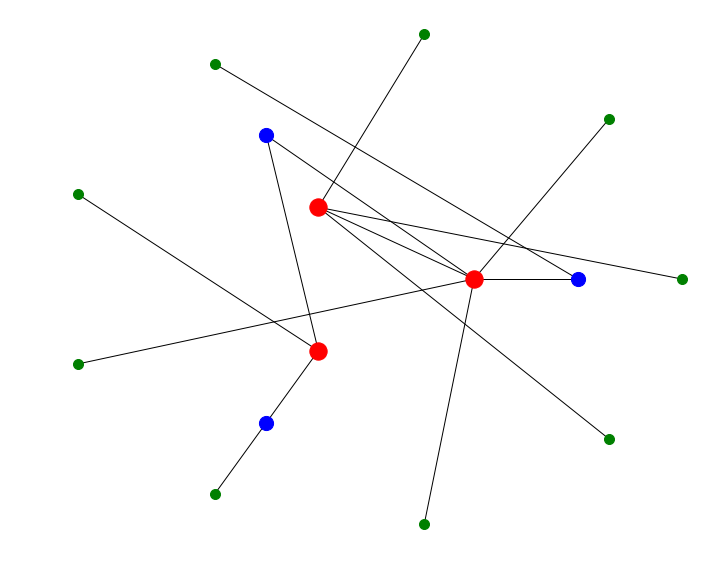

Each hub


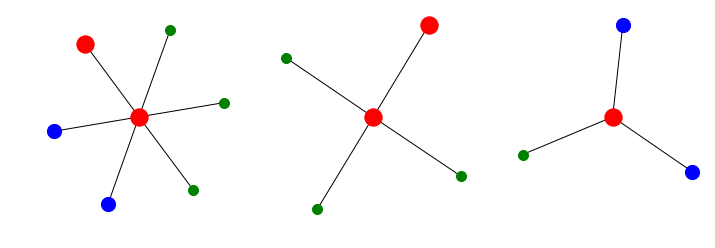

Each focus city


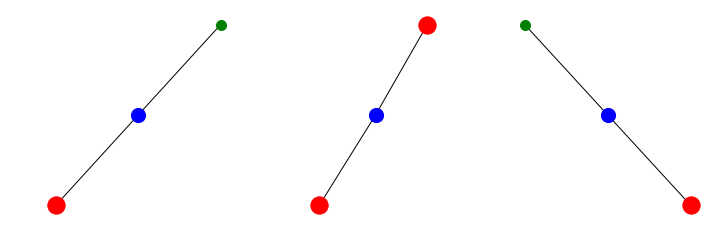

{2: array([3.33333343e-01, 6.62273880e-09]),
 0: array([-0.16666669,  0.28867513]),
 7: array([-0.16666664, -0.28867516]),
 3: array([6.66666687e-01, 1.32454776e-08]),
 6: array([-0.33333337,  0.57735026]),
 9: array([-0.33333328, -0.57735032]),
 1: array([1.00000000e+00, 6.62273836e-09]),
 4: array([0.7660445 , 0.64278758]),
 5: array([0.17364825, 0.98480773]),
 8: array([-0.5       ,  0.86602539]),
 10: array([-0.93969256,  0.34202021]),
 11: array([-0.93969256, -0.34202015]),
 12: array([-0.49999988, -0.86602545]),
 13: array([ 0.17364818, -0.98480773]),
 14: array([ 0.76604438, -0.64278775])}

In [4]:
# Graphs
ba = ba_model(N=15, m=1, threshold=1.5, seed=100)
ba.shell_b()
ba.hub()
ba.focus()

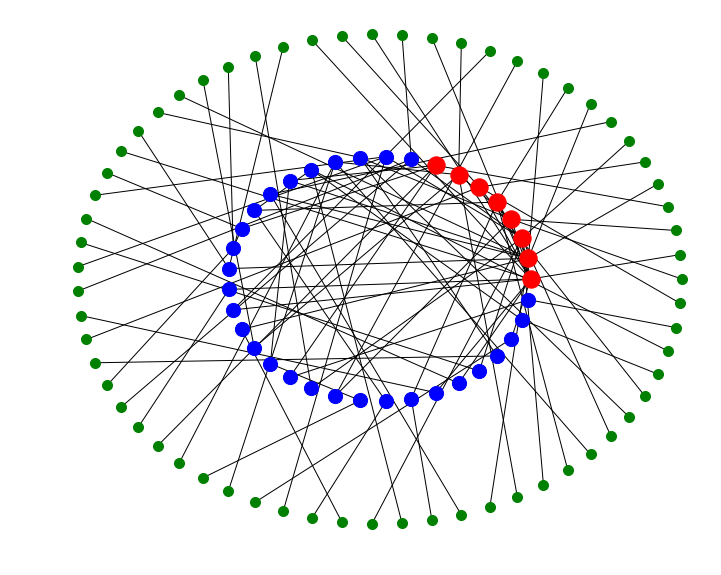

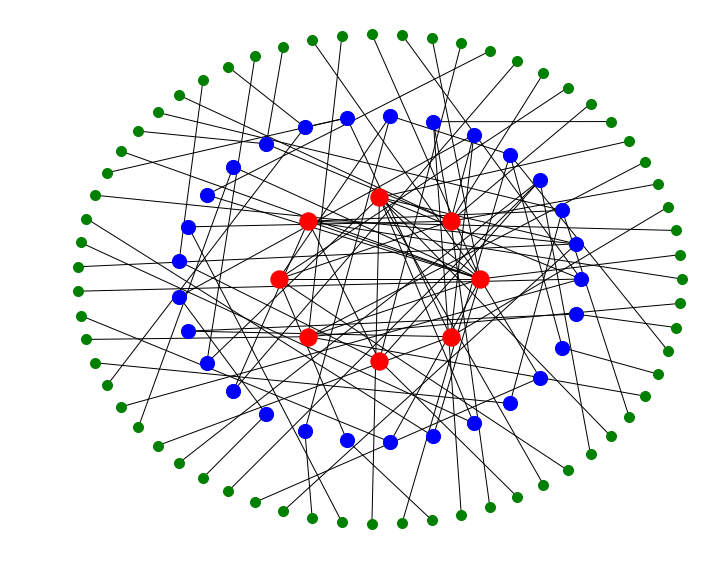

The 5 largest hubs of 8


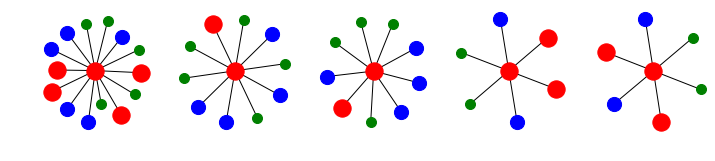

The 5 largest focus cities of 29


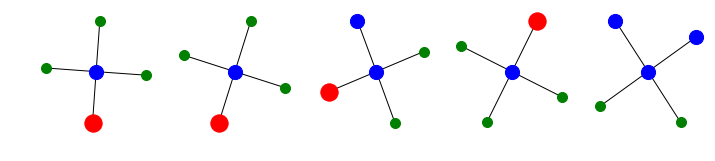

In [5]:
# Graphs
ba = ba_model(N=100, m=1, threshold=2.5, seed=100)
# ba.draw()
ba.shell_a()
ba.shell_b()
ba.hub()
ba.focus()

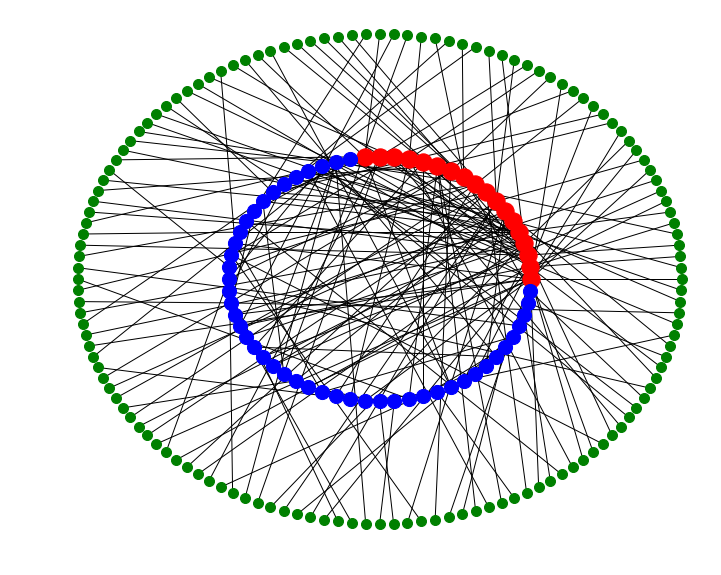

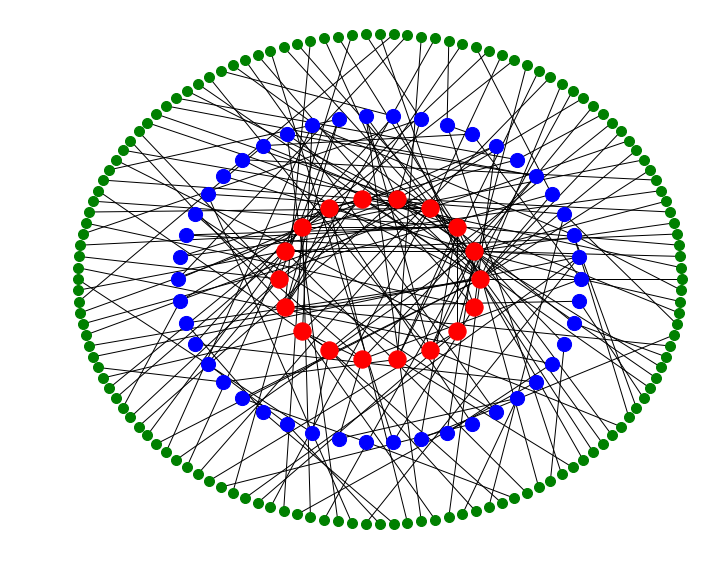

The 5 largest hubs of 18


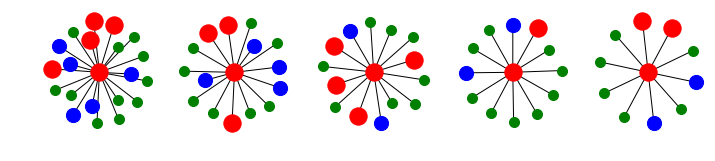

The 5 largest focus cities of 46


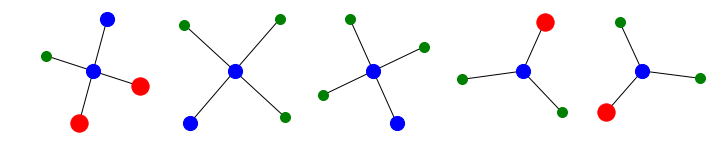

In [6]:
# Graphs
ba = ba_model(N=200, m=1, threshold=2.5, seed=100)
# ba.draw()
ba.shell_a()
ba.shell_b()
ba.hub()
ba.focus()